In [50]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import LowessSmoother
import skfda
from skfda.representation.interpolation import SplineInterpolation
from sklearn.preprocessing import normalize

# Andiamo ad aprire le bande dei campi 4 e 6

In [51]:
with open('./pickles/campo4_bande.pickle', 'rb') as handle:
    campo4 = pickle.load(handle)
with open('./pickles/campo6_bande.pickle', 'rb') as handle:
    campo6 = pickle.load(handle)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.01, iterations=1)

print(campo4.shape)
print(campo6.shape)

(57, 12, 43, 74)
(57, 12, 52, 84)


In [52]:
Allpixelndvi4 = (campo4[:,7,:,:]-campo4[:,5,:,:])/(campo4[:,7,:,:]+campo4[:,5,:,:])
Allpixelndvi6 = (campo6[:,7,:,:]-campo6[:,5,:,:])/(campo6[:,7,:,:]+campo6[:,5,:,:])

C:\Users\pc\AppData\Local\Temp\ipykernel_6416\833565723.py:1: RuntimeWarning: invalid value encountered in divide
  Allpixelndvi4 = (campo4[:,7,:,:]-campo4[:,5,:,:])/(campo4[:,7,:,:]+campo4[:,5,:,:])
C:\Users\pc\AppData\Local\Temp\ipykernel_6416\833565723.py:2: RuntimeWarning: invalid value encountered in divide
  Allpixelndvi6 = (campo6[:,7,:,:]-campo6[:,5,:,:])/(campo6[:,7,:,:]+campo6[:,5,:,:])


In [53]:
validePixelNDVI4 = np.zeros([57,43,74])
#validePixelNDRE = []
for a in range(Allpixelndvi4.shape[1]):
    for b in range(Allpixelndvi4.shape[2]):
        if(not np.isnan(np.sum(Allpixelndvi4[:,a,b]))):
            validePixelNDVI4[:,a,b] = Allpixelndvi4[:,a,b]

In [54]:
validePixelNDVI6 = np.zeros([57,52,84])
#validePixelNDRE = []
for a in range(Allpixelndvi6.shape[1]):
    for b in range(Allpixelndvi6.shape[2]):
        if(not np.isnan(np.sum(Allpixelndvi6[:,a,b]))):
            validePixelNDVI6[:,a,b] = Allpixelndvi6[:,a,b]

In [55]:
#print(validePixelNDVI4)
print(validePixelNDVI6.shape)

(57, 52, 84)


248860


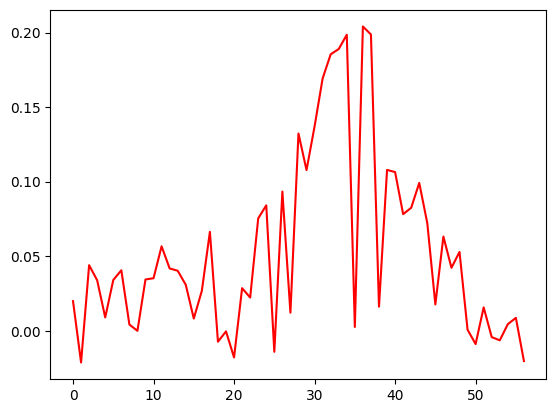

In [56]:
print(np.count_nonzero(Allpixelndvi6))
plt.plot(Allpixelndvi6[:,30,30], color="red")

# Faccio lo smoothing delle serie temporali

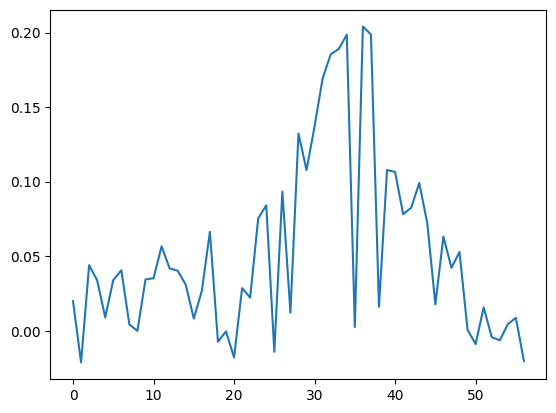

In [57]:
imageSmooth_6 = np.zeros([57, 52, 84])

for x in range(validePixelNDVI6.shape[1]):
    for y in range(validePixelNDVI6.shape[2]):
        imageSmooth_6[:,x,y] = smoother.smooth(validePixelNDVI6[:,x,y]).smooth_data[0]

plt.plot(imageSmooth_6[:,30,30])

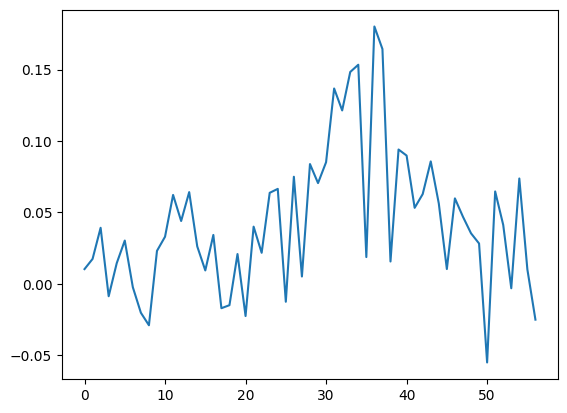

In [61]:
imageSmooth_4 = np.zeros([57, 43, 74])

for x in range(validePixelNDVI4.shape[1]):
    for y in range(validePixelNDVI4.shape[2]):
        imageSmooth_4[:,x,y] = smoother.smooth(validePixelNDVI4[:,x,y]).smooth_data[0]

plt.plot(imageSmooth_4[:,20,60])

# Plot di tutte le curve

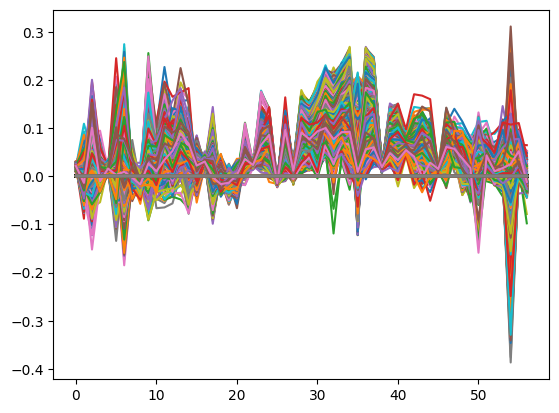

In [64]:
for x in range(imageSmooth_6.shape[1]):
    for y in range(imageSmooth_6.shape[2]):
        plt.plot(imageSmooth_6[:,x,y])